# AaronTools and Matplotlib

You can download the Jupyter Notebook version of this page <a href="https://github.com/QChASM/AaronTools-docs/blob/main/source/tutorials/Jupyter_Matplotlib.ipynb" target="_blank">here</a> (click "Download raw file").

AaronTools `Geometry` objects can be plotted within Matplotlib figures using 'HoukMol' style (you'll recognize it when you see it).

For instance, if we just want to generate a HoukMol style image of a molecule, we can create an empty Matplotlib figure/axis, set a reasonable scale, set the aspect to 'equal' and then plot the molecule:

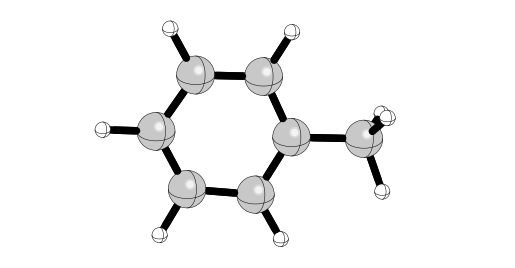

In [1]:
from AaronTools.geometry import Geometry
import matplotlib.pyplot as plt

# Create AaronTools geometry
geom = Geometry.from_string('toluene', form='iupac')

fig, ax = plt.subplots() # create figure and axis
ax.axis('off')           # hide axes
ax.set_xlim(-5,5)        # set scale for x-axis
ax.set_aspect('equal')   # set aspect to 'equal'
geom.plot(ax, fig)       # plot molecule
plt.show()

If we want to insert a molecular structure into a plot of data, we need to create a subplot in order to control the scale of the molecular structure.

We will also need to set both the x- and y-limits to enable control over the vertical and horizontal placement of the molecule within the plot.

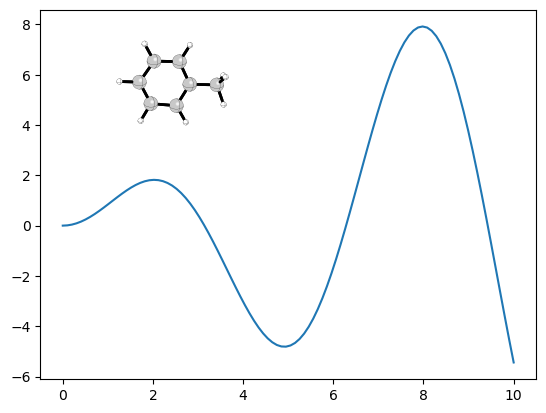

In [2]:
from AaronTools.geometry import Geometry
import matplotlib.pyplot as plt
import numpy as np

# Create dummy plot of data as an example
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
plt.plot(x, x*np.sin(x))

# add subplot to hold molecular structure figure
ax2=fig.add_subplot(111, label="HoukMol", frame_on=False)
ax2.axis('off')
ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)
ax2.set_aspect('equal')

# Create AaronTools geometry
geom = Geometry.from_string('toluene', form='iupac')
# Shift geometry to place it within overall figure
geom.coord_shift([-6, 6, 0])
# Plot AaronTools geometry
geom.plot(ax2, fig)
plt.show()

Finally, one of the most useful aspects of being able to plot AaronTools geometries within a Matplotlib figure is to superimpose computed molecular data over top of a HoukMol style molecule.

For example, below we use Psi4 to calculate the electrostatic potential (ESP) in the plane 3.5 A from  pyridine at the HF/STO-3G level and then make a semi-transparent contour plot of this data on top of a HoukMol figure of pyridine at the same scale.

In this way, we can visualize the ESP (or other data computed on a grid) in the vicinity of a molecule!

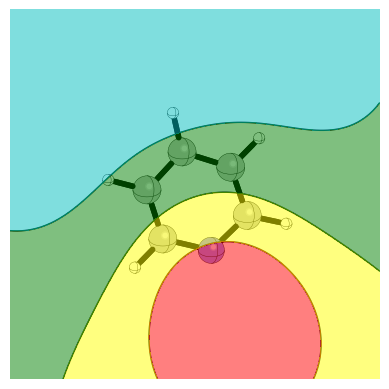

In [3]:
from AaronTools.geometry import Geometry
import psi4
import psi4.core as p4c

# Build Geometry and convert to Psi4 molecule object
geom = Geometry.from_string('pyridine', form='iupac') # Will be *close* to being in the XY plane
mol = geom.convert_to_Psi4()

# build grid to compute ESP on
xgrid = np.linspace(-5, 5, 100)
ygrid = np.linspace(-5, 5, 100)

# build 2D meshgrid
x, y = np.meshgrid(xgrid, ygrid)

# Get HF/STO-3G wavefunction using Psi4
psi4.set_output_file("output.dat", False)
energy, wfn = psi4.energy('scf/sto-3g', return_wfn = True)

# Build 3D grid in z = 3.5 A plane and setup ESP calculation on grid
points = np.vstack([x.ravel(), y.ravel()] + [np.array([3.5]*xgrid.size*ygrid.size)]).T
psi4_matrix = p4c.Matrix.from_array(points)
myepc = p4c.ESPPropCalc(wfn)
psi4.set_num_threads(8, quiet = True)

# Calculate ESP and convert to kcal/mol
ESP = 627.51*np.array(myepc.compute_esp_over_grid_in_memory(psi4_matrix))

# Convert ESP to 2D array
ESP = ESP.reshape(x.shape)

# Make contour plot superimposed over HoukMol image
ESPmax = 5
ESPmin = -5
scale=np.arange(ESPmin, ESPmax, (ESPmax - ESPmin)/5)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.axis('off')

CS = ax.contour(x, y, ESP, scale, colors='k',linewidths=1, zorder=10, linestyles='solid')
CSF = ax.contourf(x, y, ESP, scale, colors=('r','yellow','g','c','b'), alpha=0.5, extend='both', zorder=10)
geom.plot(ax, fig)
plt.show()